## FRUIT CLASSIFICATION
1. Data Collection(website)
2. Data Cleaning(Selecting Particular Format(jpg))
3. Data Selection
4. Data Transformation 
5. Modeling  
6. Data Visulization

In [18]:
### Import all my librarys 
%matplotlib inline
import numpy as np  # Numerical Computation 
import pandas as pd # Data analysis
import matplotlib.pyplot as plt # Data visulization

# Machine leaning packages
from sklearn.utils import Bunch  # bunch["value_key"], or by an attribute, bunch.value_key.
from sklearn.model_selection import train_test_split,validation_curve
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

# Image Processing 
from skimage.io import imread # Which is used to read the image 
from skimage.transform import resize

!pip install scikit-image

In [22]:
Apples_path = "Data/Fruits/Apples/1.jpg"
Banana_path = "Data/Fruits/Banana/1.jpg"

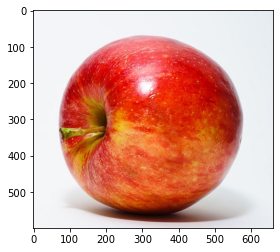

In [29]:
Apple_img = plt.imread(Apples_path)
plt.imshow(Apple_img)

In [32]:
Apple_img

array([[[244, 245, 249],
        [244, 245, 249],
        [244, 245, 249],
        ...,
        [228, 235, 241],
        [228, 235, 241],
        [228, 235, 241]],

       [[244, 245, 249],
        [244, 245, 249],
        [244, 245, 249],
        ...,
        [228, 235, 241],
        [228, 235, 241],
        [228, 235, 241]],

       [[244, 245, 249],
        [244, 245, 249],
        [244, 245, 249],
        ...,
        [228, 235, 241],
        [228, 235, 241],
        [228, 235, 241]],

       ...,

       [[244, 245, 247],
        [244, 245, 247],
        [244, 245, 247],
        ...,
        [234, 237, 242],
        [234, 237, 242],
        [234, 237, 242]],

       [[244, 245, 247],
        [244, 245, 247],
        [244, 245, 247],
        ...,
        [234, 237, 242],
        [234, 237, 242],
        [234, 237, 242]],

       [[244, 245, 247],
        [244, 245, 247],
        [244, 245, 247],
        ...,
        [234, 237, 242],
        [234, 237, 242],
        [234, 237, 242]]

In [30]:
Apple_img.shape

(599, 661, 3)

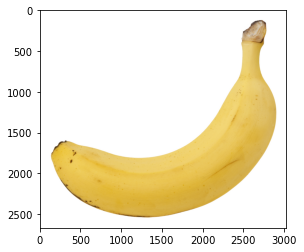

In [53]:
Banana_img = plt.imread(Banana_path)
plt.gray()
plt.imshow(Banana_img)

In [41]:
from skimage import filters

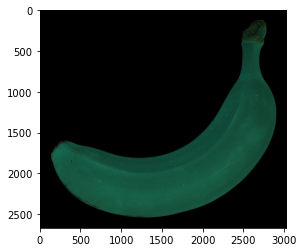

In [44]:
edges = filters.sobel(Banana_img)
plt.imshow(edges)

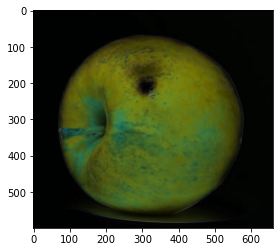

In [45]:
edges = filters.sobel(Apple_img)
plt.imshow(edges)

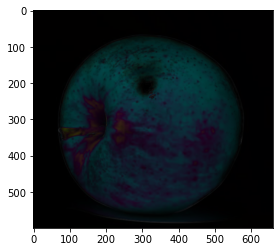

In [47]:
app_ed = filters.prewitt(edges)
plt.imshow(app_ed)

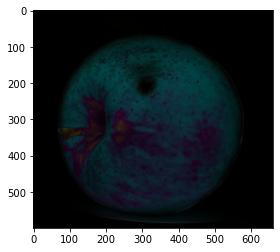

In [48]:
app_ed = filters.scharr(edges)
plt.imshow(app_ed)

In [70]:
from pathlib import Path

def Image_segmantation(paths, dim =(300,300)):
  """Converting Orginal Dim of Your Data in to 300px into 300px now is shape of each image is 300*300"""
  
  image_dir = Path(paths)
  folders = [dir for dir in image_dir.iterdir() if dir.is_dir()]
  categories = [fo.name for fo in folders]
  
  
  describe= "Image Segmantation"
  
  images = []
  flat_data = []
  target = []
  
  
  for i,dirc in enumerate(folders):
    for file in dirc.iterdir():
      img = imread(file)
      #print("Before Resize")
      #plt.imshow(img)
      #plt.show()
      
      #print("After Resize of image")
      img_resize = resize(img,dim)
      plt.imshow(img_resize)
      #plt.show()
      
      
      flat_data.append(img_resize.flatten())
      images.append(img_resize)
      target.append(img_resize)
      
  flat_data = np.array(flat_data)
  target = np.array(target)
  images = np.array(images)
  
  return Bunch(Data = flat_data,
               Target = target,
               Target_name = categories,
               images = images,
               descr = describe
              )
  
  
      

{'Data': array([[0.95294118, 0.95294118, 0.97254902, ..., 0.90980392, 0.92156863,
         0.94509804],
        [0.24337255, 0.3526217 , 0.21950327, ..., 0.35204654, 0.44637908,
         0.28514458],
        [0.27843137, 0.52156863, 0.81960784, ..., 0.25065359, 0.26993464,
         0.38366013],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [0.99607843, 0.99607843, 0.99607843, ..., 0.81315686, 0.81315686,
         0.81315686],
        [0.73764706, 0.7572549 , 0.78078431, ..., 0.79989085, 0.78632026,
         0.79024183]]),
 'Target': array([[[[0.95294118, 0.95294118, 0.97254902],
          [0.95294118, 0.95294118, 0.97254902],
          [0.95294118, 0.95294118, 0.97254902],
          ...,
          [0.89411765, 0.91372549, 0.94117647],
          [0.88943137, 0.91372549, 0.94117647],
          [0.88627451, 0.91372549, 0.94117647]],
 
         [[0.95294118, 0.95294118, 0.97254902],
          [0.95294118, 0.95294118, 0.

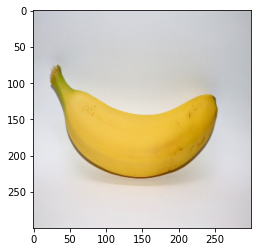

In [71]:
Data_Set = Image_segmantation("Data/Fruits/")
Data_Set

In [72]:
Data_Set.keys()

dict_keys(['Data', 'Target', 'Target_name', 'images', 'descr'])

In [77]:
Data_Set.Data.shape

(96, 270000)

In [79]:
Data_Set.Target_name

['Apples', 'Banana']